In [36]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

ppo_file = 'tmp/ppo_rwa/training.monitor.csv'
ppo_res = pd.read_csv(ppo_file,header = 1)
dqn_file = 'tmp/dqn_rwa/training.monitor.csv'
dqn_res = pd.read_csv(dqn_file,header = 1)
ddqn_file = 'tmp/ddqn_rwa/training.monitor.csv'
ddqn_res = pd.read_csv(ddqn_file,header = 1)

ppo_res.head()

,r,l,t,episode_service_blocking_rate,episode_service_accepted
0,1072.750000,5000,16.129079,0.7754,1123
1,1141.750000,5000,29.859801,0.7612,1194
2,1326.833333,5000,44.318412,0.7188,1406
3,1490.083333,5000,58.660252,0.6842,1579
4,1633.833333,5000,73.722700,0.6550,1725


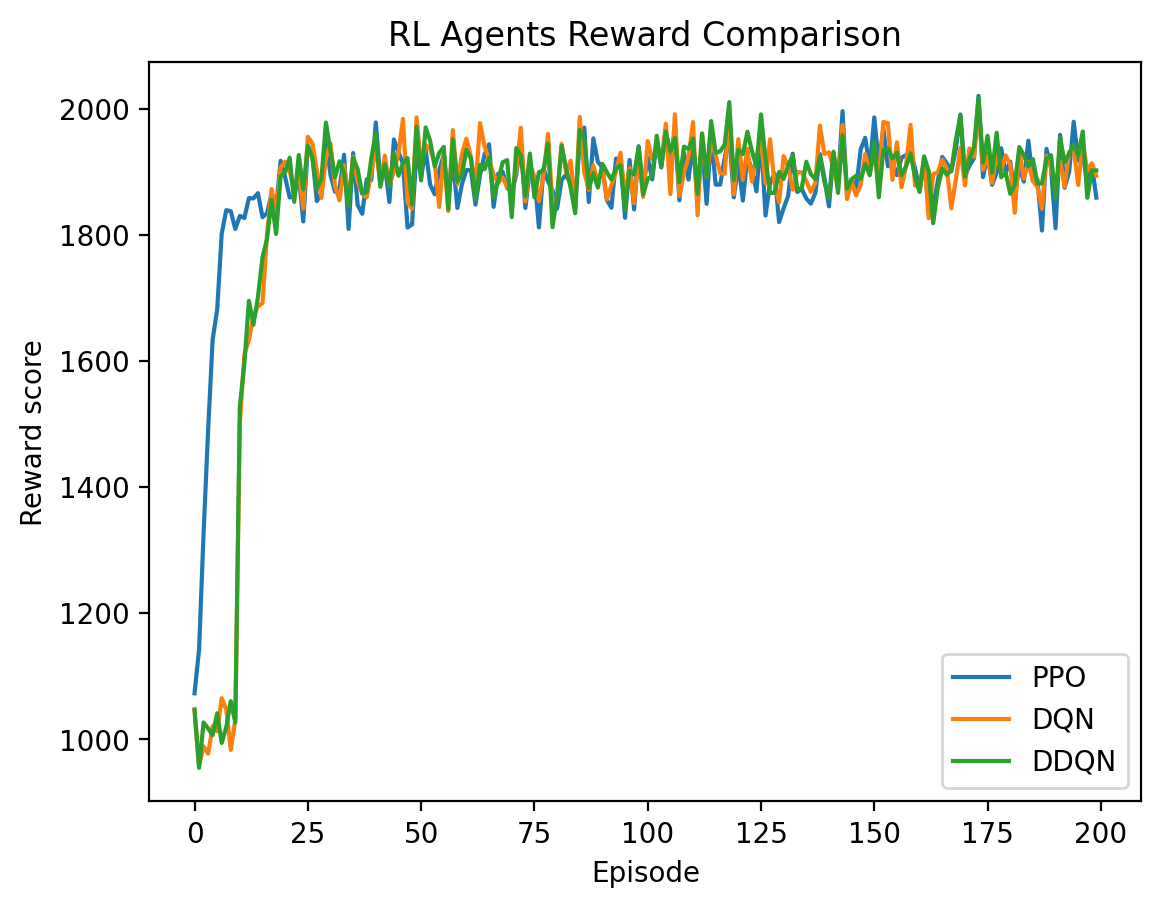

In [37]:
episodes = np.arange(len(ppo_res['r']))

plt.figure(dpi = 200)
plt.plot(episodes,ppo_res["r"])
plt.plot(episodes,dqn_res["r"])
plt.plot(episodes,ddqn_res["r"])
plt.xlabel("Episode")
plt.ylabel("Reward score")
plt.title("RL Agents Reward Comparison")
plt.legend(["PPO","DQN","DDQN"])

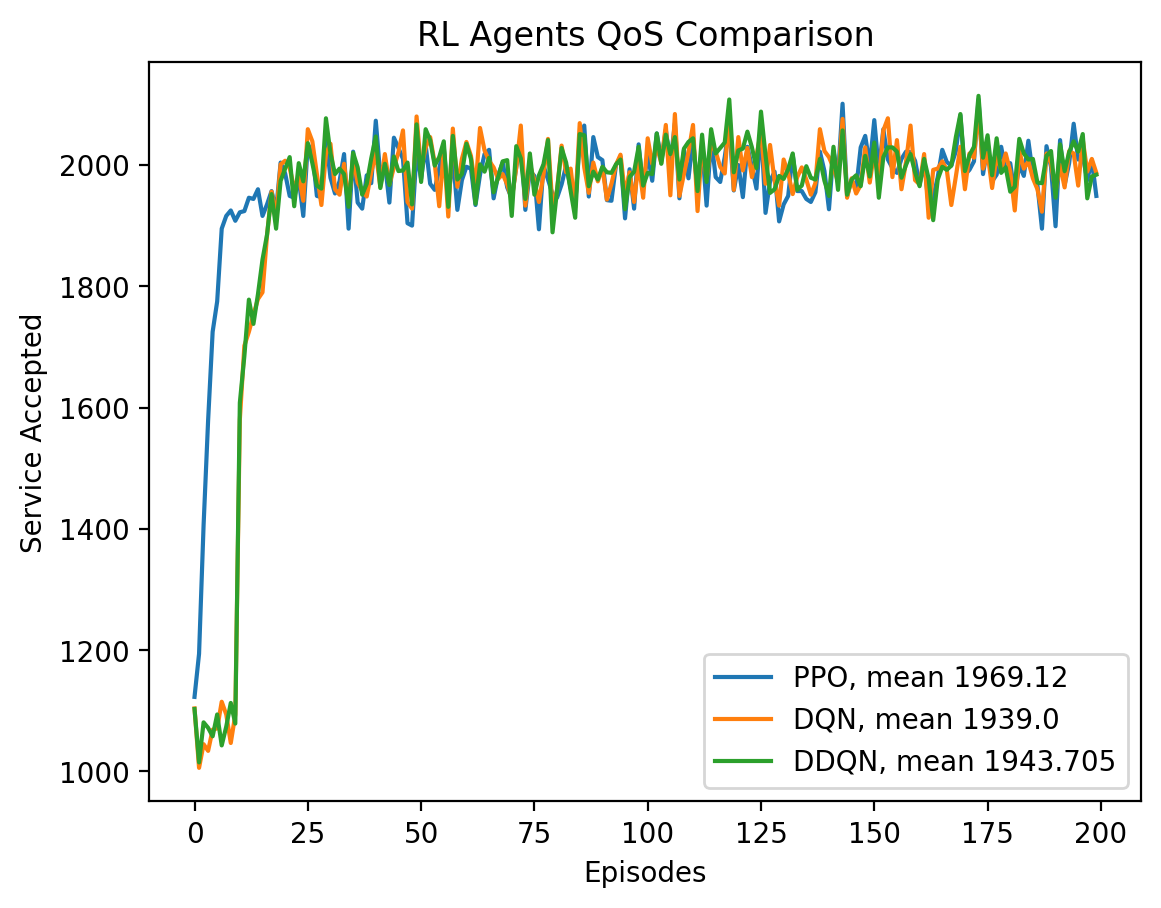

In [38]:
plt.figure(dpi = 200)
plt.plot(episodes,ppo_res["episode_service_accepted"])
plt.plot(episodes,dqn_res["episode_service_accepted"])
plt.plot(episodes,ddqn_res["episode_service_accepted"])
plt.xlabel("Episodes")
plt.ylabel("Service Accepted")
plt.title("RL Agents QoS Comparison")
plt.legend(["PPO","DQN","DDQN"])
m1 = np.mean(np.array(dqn_res["episode_service_accepted"]))
m2 = np.mean(np.array(ddqn_res["episode_service_accepted"]))
m3 = np.mean(np.array(ppo_res["episode_service_accepted"]))
plt.legend([f"PPO, mean {m3} ",f"DQN, mean {m1}",f"DDQN, mean {m2}"])

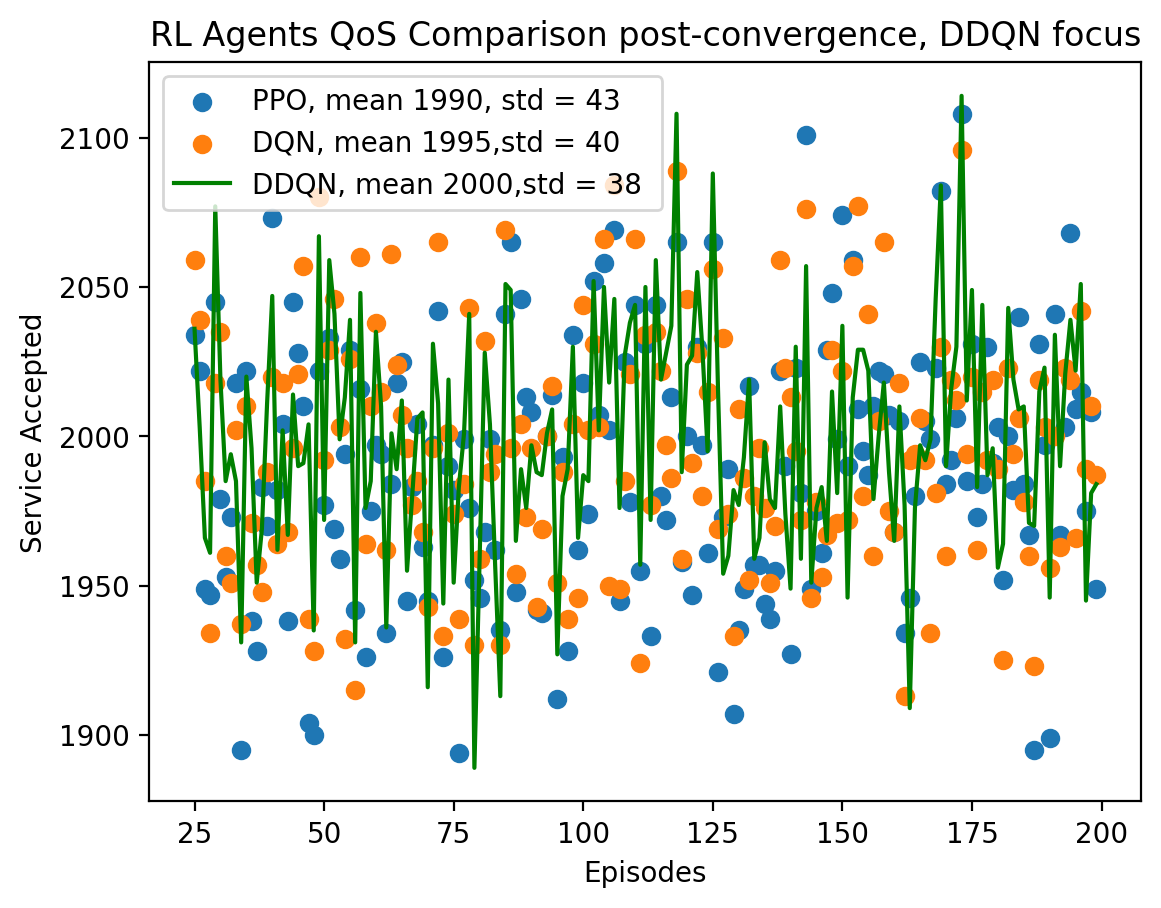

In [47]:
plt.figure(dpi = 200)
plt.scatter(episodes[25:],np.array(ppo_res["episode_service_accepted"])[25:])
plt.scatter(episodes[25:],np.array(dqn_res["episode_service_accepted"])[25:])
plt.plot(episodes[25:],np.array(ddqn_res["episode_service_accepted"])[25:],c="g")
plt.xlabel("Episodes")
plt.ylabel("Service Accepted")
plt.title("RL Agents QoS Comparison post-convergence, DDQN focus")
plt.legend(["PPO","DQN","DDQN"])
m1 = np.mean(np.array(dqn_res["episode_service_accepted"])[25:])
m2 = np.mean(np.array(ddqn_res["episode_service_accepted"])[25:])
m3 = np.mean(np.array(ppo_res["episode_service_accepted"])[25:])
s1 = np.std(np.array(dqn_res["episode_service_accepted"])[25:])
s2 = np.std(np.array(ddqn_res["episode_service_accepted"])[25:])
s3 = np.std(np.array(ppo_res["episode_service_accepted"])[25:])
plt.legend([f"PPO, mean {round(m3)}, std = {round(s3)} ",f"DQN, mean {round(m1)},std = {round(s1)} ",f"DDQN, mean {round(m2)},std = {round(s2)} "])